# Core statistical tools

Rapaio library builds it's machine learning and data mining approach from a statistical perspective. As such, the library provides the following set of features:

* generate samples from a set of common distributions
* evaluate pdf, cdf, quantile for a common set of distributions
* core statistical procedures on samples like mean and variance
* correlation coefficients computations
* standard hypothesis testing

In [1]:
%load ../rapaio-bootstrap

## Distributions

Statistics work with the concept or random variable. We can imagine a random variable like a process which generates numbers but we do not know precisely the generated value. This analogy works fine, even when we think at observing something. Let work that by an example.

Imagine that we measure the heights of some men from a given place. We notice and collect some values. We might ask which is the process that generated the heights? Since we measured something, but the values are out of our control, the question is legitimate. The answer is the total number of factors which influenced the height of a men, including genes, culture, climate, longitude and latitude, and so on. All those imaginable factors together can be seen as a process which determines the heights.

Now we identified which is the process. The next legitimate question is why random? Since there are a lot of factors inside the process, we usually are in the situation where we don't understand the underlying mechanics of the process. This can happen because we did not identified all the determinant factors. This can also happen simply because it is too complex. And there are also cases when we simply do not want or can't understand. Because of that we simply can't determine precisely the height of an individual men starting from known factors.

We can't do that for individual, but we can say something more when more individuals are analyzed. Statistics is about populations (the total set of observations) and samples (a part of the existent samples), not about individuals. Thus when we talk about an individual we talk through the lenses of population. And because it's not precise we name it random.

A random variable can be described in many ways, but all those formulations maps a potential interval of observable values with a probability. What we know when we have a random variable is a set of potential observable values and probability assigned with those values.

### Normal distribution

Normal or Gaussian distribution is perhaps the most known distribution. It is the distribution of the *bell shape*, even thought it is not unique among bell shaped distributions.

The implementation of normal distribution lies in:`rapaio.core.distributions.Normal`.


In [2]:
// build a normal distribution with mean = 2, and standard deviation = 3
Normal normal = Normal.of(2,3);

Normal distribution defined by two independent parameters: mean and standard deviation. Mean tells us when is the center of the distribution and standard deviation is a measure of variability.

We can generate a random sample from this distribution.

In [3]:
RandomSource.setSeed(1);
Var x = normal.sample(100).name("x");
x.printSummary();

> summary(name: x, type: DOUBLE)
rows: 100, complete: 100, missing: 0
        x [dbl]      
   Min. : -5.7222763 
1st Qu. : -0.4410606 
 Median :  2.0399289 
   Mean :  1.9267022 
2nd Qu. :  3.6800746 
   Max. : 11.2537520 
                     




We can notice that the sample mean is $1.927$, which is close to the population mean, but not equal. This is as expected. Since we generated a set of random values we can't expect to have a sample mean identical with population mean. If we expect that than we can suspect the generated numbers are not random.

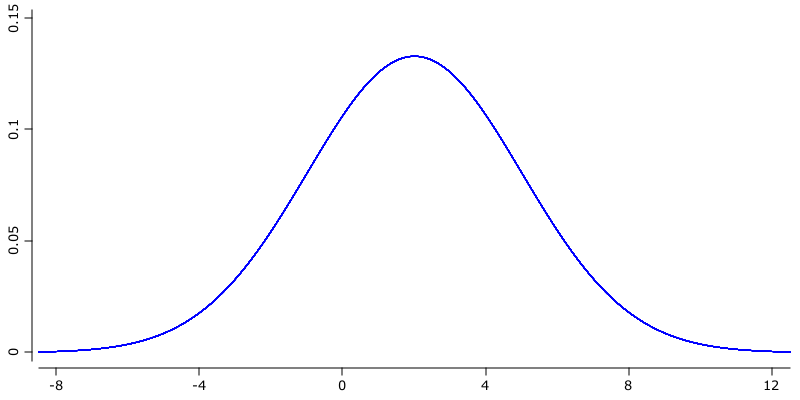

In [4]:
WS.image(funLine(normal::pdf, color(2)).xLim(-8, 12).yLim(0, 0.15));

We draw now a histogram built from the generated sample, and the distribution which was used to generate values:

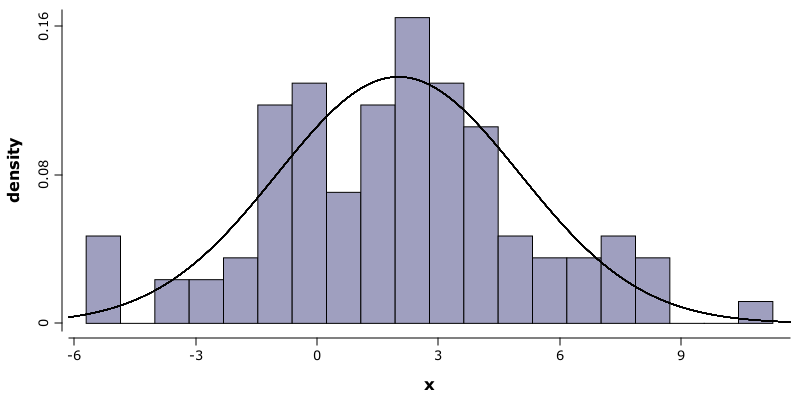

In [5]:
WS.image(hist(x, prob(true), bins(20)).funLine(normal::pdf));

### Student t distribution

Student t distribution is one of the most important distributions related with normal distribution. You can interpret the t distribution as a normal distribution, with additional uncertainty in the variance parameter.

Suppose that we are interested in the mean of a random sample normally distributed. If we know the mean and standard deviation of the population, than we could emply a z test. But often is the case where we do not know the standard deviation. What we can do? We can use a plug in estimated value for the standard deviation. The problem is that the estimated value of the standard deviation is not given anymore, it is not a given parameter of the population. Instead, it is an estimated value of that parameter, which implies the fact that it contains some error. This is the t distribution. 

Formally the t distribution can be described as:

$$T = \frac{Z}{\sqrt{V / \nu}}$$

where $Z \sim N(0,1)$, $V \sim {\chi}^2_\nu $ and $Z$ and $V$ are independent.

What is important to note here is that the degrees of freedom $\nu$ does not depend on $\mu$ or $\sigma$, parameters of the original population. This is what makes this distribution important in practice.

To increase the understanding of this intuition we will draw a normal distribution and several t distributions with various degrees of freedom.

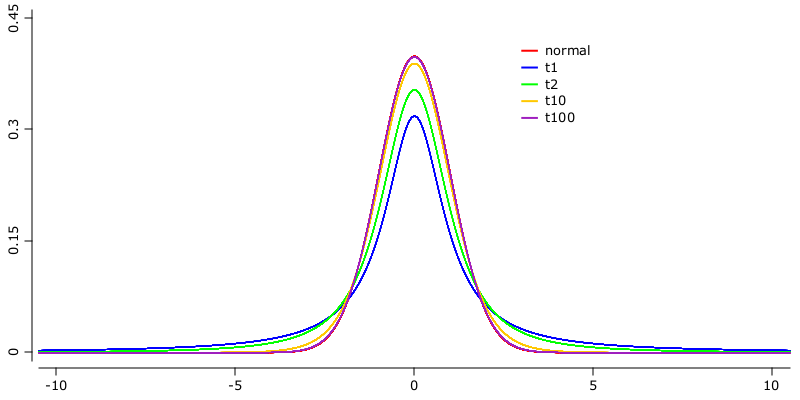

In [6]:
Normal n = Normal.std();
StudentT t1 = StudentT.of(1);
StudentT t2 = StudentT.of(2);
StudentT t10 = StudentT.of(10);
StudentT t100 = StudentT.of(100);

Plot p = funLine(n::pdf, color(1))
.funLine(t1::pdf, color(2))
.funLine(t2::pdf, color(3))
.funLine(t10::pdf, color(4))
.funLine(t100::pdf, color(5))
.xLim(-10, 10).yLim(0, 0.45)
.legend(3, 0.4, color(1, 2, 3, 4, 5), labels("normal", "t1", "t2", "t10", "t100"));

WS.image(p);

Looking at the image above we see that the standard normal distribution has the highest value at $$0$$. We note also that the t distribution with 1 degree of freedom has the lowest value at $$0$$. As the degrees of freedom increases the value at $$0$$ increases as well.

The reverse is true when we are looking for tails. The t with 1 degree of freedom has the fattest tail. This means that it have the highest uncertainty.

To illustrate better the concept, we compute the 0.975 quantiles of those distributions:

In [7]:
Normal n = Normal.std();
StudentT t1 = StudentT.of(1);
StudentT t2 = StudentT.of(2);
StudentT t10 = StudentT.of(10);
StudentT t100 = StudentT.of(100);

Var dist = VarNominal.copy(n.name(), t100.name(), t10.name(),t2.name(), t1.name()).name("distr");
Var p1 = VarDouble.copy(n.quantile(0.975), t100.quantile(0.975), t10.quantile(0.975), t2.quantile(0.975), t1.quantile(0.975)).name("q0.975");

SolidFrame.byVars(dist, p1).printContent();

                 distr                q0.975   
[0]              Normal(mu=0, sd=1)  1.959964  
[1] StudentT(df=100, mu=0, sigma=1)  1.9839715 
[2]  StudentT(df=10, mu=0, sigma=1)  2.2281389 
[3]   StudentT(df=2, mu=0, sigma=1)  4.3026527 
[4]   StudentT(df=1, mu=0, sigma=1) 12.7062047 



We can see that if the degrees of freedom increases the quantiles decreases and is getting closer to the values of normal distribution. Often the degrees of freedom is computed from the sample size in one way or another. That means the t distribution is getting closer to a normal distribution if the sample is large. Often when we are dealing with samples of size over $100$ the t distribution gives almost the same results ad the normal distribution. As a consequence normal distribution can be used as an approximation if the sample size is large.

## Core statistical tools

There are a number of tools which provides insights about a variable sample from a statistical perspective. We list below some of them.

In [8]:
var df = Datasets.loadPearsonHeightDataset();

var f = df.rvar("Father");
var s = df.rvar("Son");

Mean.of(f).printString();
Variance.of(f).toString();

WS.println(CorrPearson.of(f,s).singleValue());
WS.println(CorrSpearman.of(f,s).singleValue());

mean[Father] = 67.6868275
0.5011626808075911
0.5056466119232446


## Hypothesis testing

Rapaio library aims to contain an extensive set of alternatives for hypothesis testing. Right now there are available just some of them. Hypothesis testing an invaluable tool to answer questions when we are dealing with uncertainty.

We deal with presenting hypothesis testing by following some examples.

### Z tests

Any hypothesis test which uses normal distribution for the computed statistic is named a z test. We should note that z tests needs to know standard deviations for the involved populations. It is accustomed that when the sample is large enough the value of the population standard deviation can be estimated from data. This is not implemented in library. For the case when one does not know the involved standard deviations one can use t tests.

Note than because of this requirement, the z tests are rarely used. This is so because we rarely know the population parameters.

#### Example 1: One sample z-test

*Sue is in charge of Quality Control at a bottling facility (This example is taken from __[here](http://www.cliffsnotes.com/study-guides/statistics/univariate-inferential-tests/two-sample-z-test-for-comparing-two-means)__). She is checking the operation of a machine that should deliver 355 mL of liquid into an aluminum can. If the machine delivers too little, then the local Regulatory Agency may fine the company. If the machine delivers too much, then the company may lose money. For these reasons, Sue is looking for any evidence that the amount delivered by the machine is different from 355 mL.*

During her investigation, Sue obtains a random sample of $10$ cans. She measures the following volumes:

$355.02 355.47 353.01 355.93 356.66 355.98 353.74 354.96 353.81 355.79$

The machine's specifications claim that the amount of liquid delivered varies according to a normal distribution, with mean $\mu = 355mL$ and standard deviation $\sigma = 0.05mL$.

Do the data suggest that the machine is operating correctly?

The null hypothesis is that the machine is operating according to its specifications; thus

$$H_0 : μ = 355$$ 

$\mu$ is the mean volume delivered by the machine. Sue is looking for evidence of any difference; thus, the alternate hypothesis is

$$H_1 : \mu \neq 355$$

Since the hypothesis concerns a single population mean and the population follows a normal distribution with known standard deviation, a z-test is appropriate.

What we can do is to use *HTTools* facility which offers shortcut methods to all implemented hypothesis tests. One of them is one sample z test which enables one to test if the sample mean is far from the expected sample mean.


In [9]:
Var cans = VarDouble.copy(355.02, 355.47, 353.01, 355.93, 356.66, 355.98, 353.74, 354.96, 353.81, 355.79);
// run the test and print results
ZTestOneSample.test(cans, 355, 0.05).printSummary();


> HTTools.zTestOneSample

 One Sample z-test

mean: 355
sd: 0.05
significance level: 0.05
alternative hypothesis: two tails P > |z|

sample size: 10
sample mean: 355.037
z score: 2.3400855
p-value: 0.019279327322640594
conf int: [355.0060102,355.0679898]



The interpretation of the results is the following:

* the z-score is $2.34$, which means that the computed sample mean is greater with more than 2 standard deviations
* for critical level being $0.05$ and p-value $0.019$, we reject the null hypothesis that the mean volume delivered by the machine is equal with $355$

**Note:** even if we know that the sample mean is greater than the proposed mean, we cannot propose this conclusion. The proper conclusion would be that *is different than $355$*.

##### What if we ask if the machine produces more than standard specification?

We deal with this question by changing the null hypothesis. Our hypotheses become:

$$H_0 : \mu \leq 355$$

$$H_1 \geq 355$$

Our code looks like:

In [10]:
ZTestOneSample.test(cans,
355, /* mean */
0.05, /* sd */
0.05, /* significance level */
HTest.Alternative.GREATER_THAN /* alternative */
).printSummary();


> HTTools.zTestOneSample

 One Sample z-test

mean: 355
sd: 0.05
significance level: 0.05
alternative hypothesis: one tail P > z

sample size: 10
sample mean: 355.037
z score: 2.3400855
p-value: 0.009639663661320297
conf int: [355.0060102,355.0679898]



As expected the statistical power of this test is increased. As a consequence the p value was smaller and we still reject the null hypothesis. In this case we had an obvious case, when testing one side gave the same result as testing with two sides. I gave example just to help the user to pay attention to those kind of details.

#### Example 2: One sample z-test

*A herd of $1500$ steer was fed a special high‐protein grain for a month. A random sample of $29$ were weighed and had gained an average of $6.7$ pounds. If the standard deviation of weight gain for the entire herd is $7.1$, test the hypothesis that the average weight gain per steer for the month was more than $5$ pounds. We have the following null and alternative hypothesis:*

$$H_0 : \mu = 5$$
$$H_1 : \mu > 5$$

This example is adapted from __[here](https://en.wikibooks.org/wiki/Statistics/Testing_Data/z-tests#Is_The_Machine_Working_Correctly.3F)__

In [11]:
ZTestOneSample ztest = ZTestOneSample.test(
6.7, /* sample mean */
29, /* sample size */
5, /* tested mean */
7.1, /* population standard deviation */
0.05, /* significance level */
HTest.Alternative.GREATER_THAN /* alternative */
);
ztest.printSummary();


> HTTools.zTestOneSample

 One Sample z-test

mean: 5
sd: 7.1
significance level: 0.05
alternative hypothesis: one tail P > z

sample size: 29
sample mean: 6.7
z score: 1.2894057
p-value: 0.0986285477062051
conf int: [4.1159112,9.2840888]



P-value is greater than significance level which means that we cannot reject the null hypothesis. We don't have enough evidence.

#### Example 3: Two samples z test

*The amount of a certain trace element in blood is known to vary with a standard deviation of $14.1$ ppm (parts per million) for male blood donors and $9.5$ ppm for female donors. Random samples of $75$ male and $50$ female donors yield concentration means of $28$ and $33$ ppm, respectively. What is the likelihood that the population means of concentrations of the element are the same for men and women?*

According with central limit theorem we can assume that the distribution of the sample mean is a normal distribution. More than that, since we have random samples, than the sample mean difference has a normal distribution. And because we know the standard deviation for each population, we can use a two sample z test for testing the difference of the sample means.

$$H_0 : \mu_1 - \mu_2 = 0$$
$$H_1 : \mu_1 - \mu_2 \neq 0$$

This example is taken from __[here](http://www.cliffsnotes.com/study-guides/statistics/univariate-inferential-tests/two-sample-z-test-for-comparing-two-means)__.

In [12]:
ZTestTwoSamples.test(
28, 75, /* male sample mean and size */
33, 50, /* female sample mean and size */
0, /* difference of means */
14.1, 9.5 /* standard deviations */
).printSummary();


> HTTools.zTestTwoSamples

 Two Samples z-test

x sample mean: 28
x sample size: 75
y sample mean: 33
y sample size: 50
mean: 0
x sd: 14.1
y sd: 9.5
significance level: 0.05
alternative hypothesis: two tails P > |z|

sample mean: -5
z score: -2.3686842
p-value: 0.017851489594360337
conf int: [-9.1372421,-0.8627579]



The test run with $0.05$ significance level (because it was a default value). The alternative is two tails since we test for difference in means not equal with zero. The resulted p-value is lower than the significance value which means that we reject the hypothesis that the two populations have the same mean. We can see that also from confidence interval, since it does not include $0$.

**Note:** If we would considered a significance level of $0.01$ than we would not be able to reject the null hypothesis.

### T tests

T tests are similar with z tests. Both tests uses a statistic which has a normal distribution. A z test is used when one knows standard deviations. A t test is used when the standard deviation is estimated from data. Note that when the sample size is large enough, both tests gives virtually identical results, since the t distributions converges to a normal distribution when the sample increases.

#### Example 4:

*A baseball team coach wants to know if his team is significantly different than other teams in the league in scoring runs. Nationally, the average number of score runs is 5.7. He peek randomly five games which happen to have scores: 8, 9, 4, 10 and 8.*

The coach is looking to see if the average number of scores for his team is different than the national average, which is given. We can assume the sample is normally distributed. A z test would be fine under those conditions, but we do not know the national standard deviations. We have to estimate that from sample. Thus a t test is proper in this case, especially because the sample is so small. We fix the significance level at $0.05$ and choose the two tail version of the test since we are interested in testing the equality.

In [13]:
Var x = VarDouble.copy(8, 9, 4, 10, 8).name("x");
TTestOneSample.test(x, 5.7).printSummary();


> TTestOneSample

 One Sample t-test

mean: 5.7
significance level: 0.05
alternative hypothesis: two tails P > |z|

sample size: 5
sample mean: 7.8
sample sd: 2.2803509
df: 4
t: 2.0592194
p-value: 0.10854860356776591
conf int: [4.9685704,10.6314296]



The p-value is greater that significance level, so we fail to reject the test.

What if we would estimate the sample standard deviation directly from the sample and we would than use a z test? Let's see.

In [14]:
Var x = VarDouble.copy(8, 9, 4, 10, 8).name("x");
ZTestOneSample.test(x, 5.7, Variance.of(x).sdValue()).printSummary();


> HTTools.zTestOneSample

 One Sample z-test

mean: 5.7
sd: 2.2803509
significance level: 0.05
alternative hypothesis: two tails P > |z|

sample size: 5
sample mean: 7.8
z score: 2.0592194
p-value: 0.03947322372463613
conf int: [5.8012211,9.7987789]



According with this test the mean score of the team is different than the national average. This is an illustration failed application of central limit theorem fails with small number of observations. The t test was built to incorporate the unknown in estimating the variance. Thus we increase the need to provide stronger evidence to reject the null hypothesis.